# A mind map for of NLP

The full cheatsheet is now out, if you want to have a look: https://www.kaggle.com/rftexas/nlp-cheatsheet-master-nlp

This notebook is **not designed the same way** as most cheatsheets. Since NLP resources are awash on the Internet, I felt like I needed some structure. More importantly, I have been seeking for months a bird eye view of the field. 

This cheatsheet is designed to give a **hollistic view of NLP**. Furthermore, it is structured in such a way that you can follow **how NLP has evolved over the years from co-occurence matrices to state-of-the art transformers**.

Don't expect to find too much knowledge within the sections as the aim of the notebook is mainly **to give you a map of how the field is structued and why such advancements have been made over the last few years**. 

As a tip, I would recommend learning this structure (to have a structrued view of NLP) and to look for details when needed.

I will continually update this notebook regularly with questions that you can include in your favorite **note-taking** or **spaced-repetition** software (Anki is a must for this matter).

<p style="text:red"><b>If you like this work, don't forget to upvote the notebook as it encourages me to do it for many other fields. In particular, I plan on doing the same for Transformers, geometric deep learning and computer vision in the near future.</b></p>

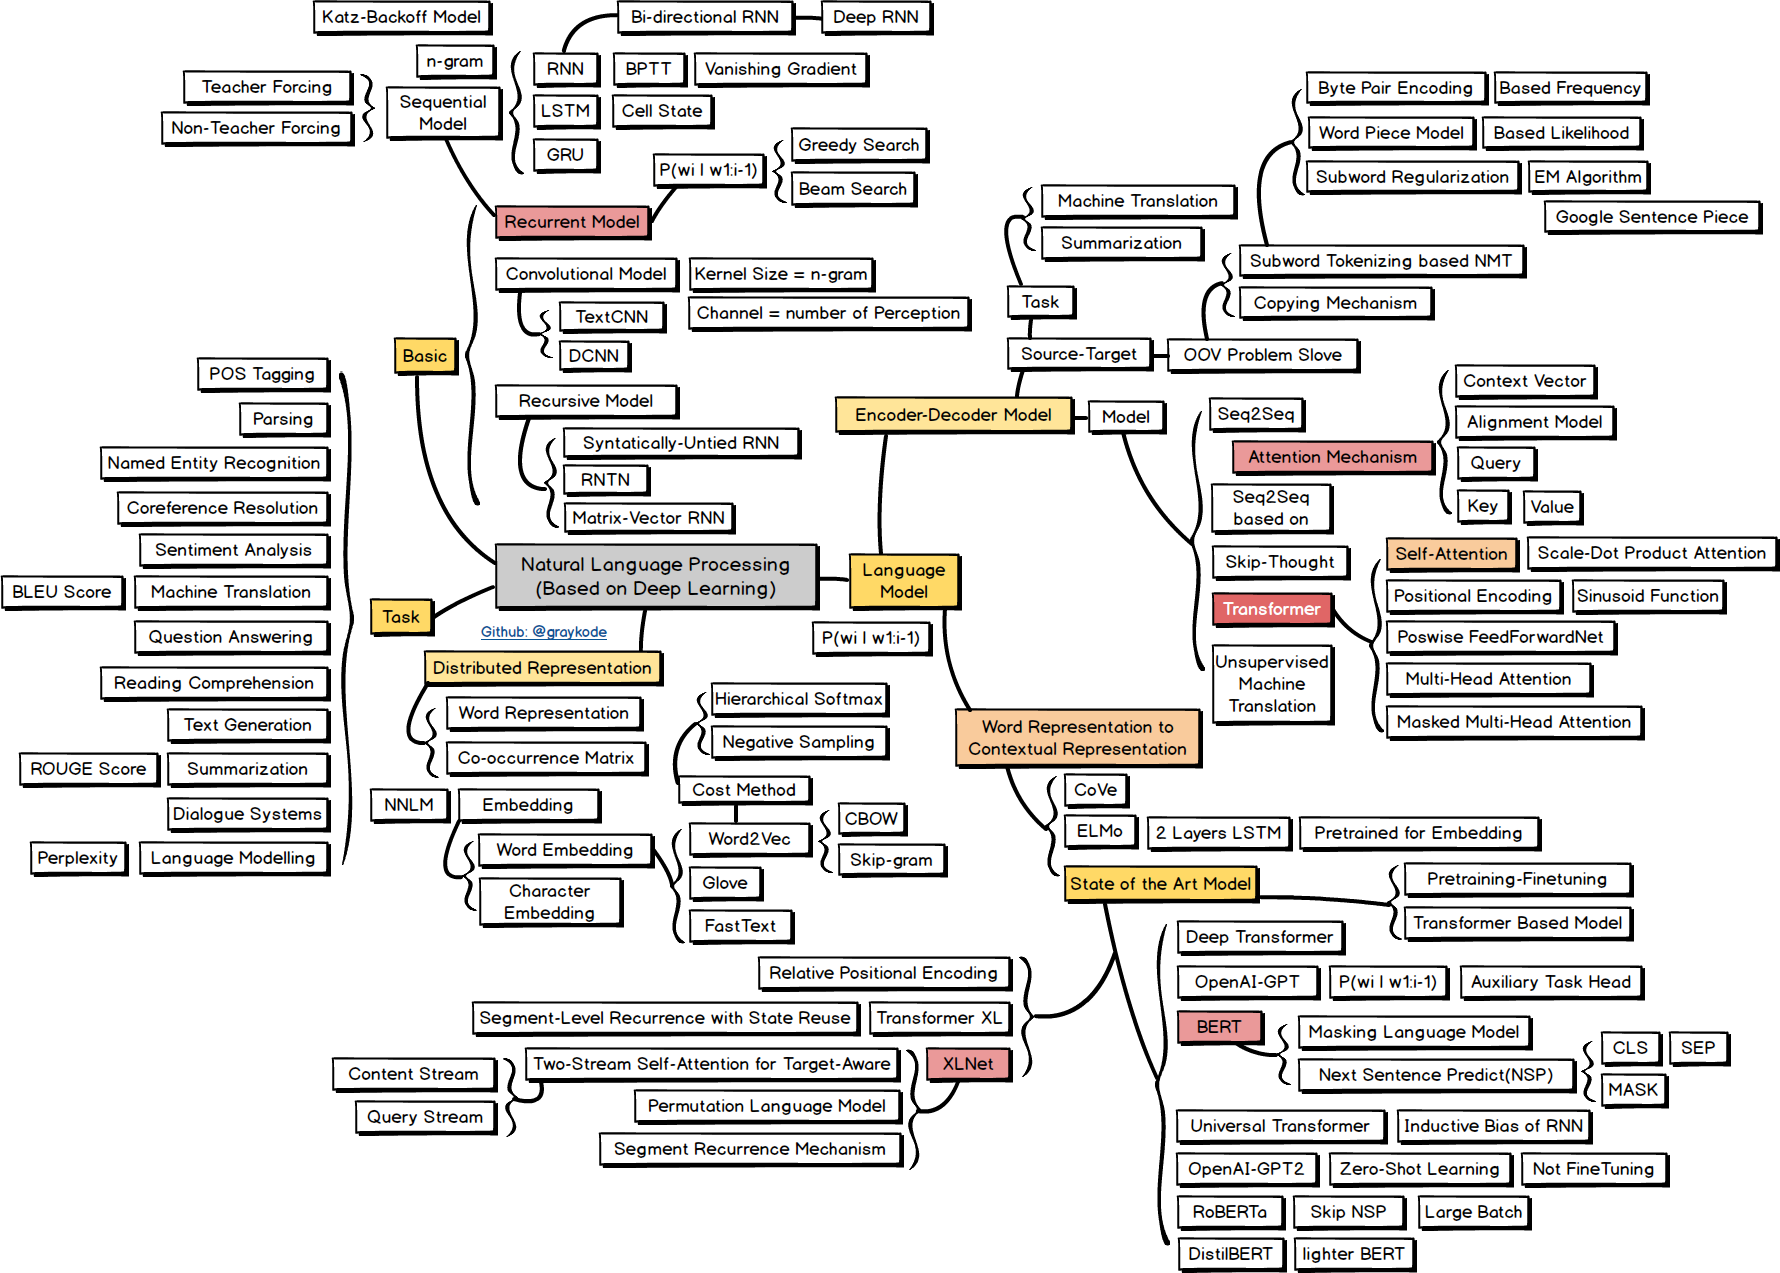

Credits to @graykode on Github for this amazing mind map

Also this notebook mostly summarizes those amazing resources:
- https://nlpoverview.com/#d-attention-mechanism
- https://medium.com/saarthi-ai/transformers-attention-based-seq2seq-machine-translation-a28940aaa4fe
- http://web.stanford.edu/class/cs224n/ (almost all the illustrations are extracted from this amazing course)

# Table of contents

- <a href='#1'>1. A classification of NLP tasks</a>  


- <a href='#2'>2. Learning representations that conveys semantic and syntactic meaning</a>

     - <a href='#1-1'>2.1. Denotational semantics, a naïve approach</a>
     - <a href='#1-2'>2.2. SVD-based methods</a>
     
         - <a href='#2.2.1'>2.2.1. Word-document matrix</a>
         - <a href='#2.2.2'>2.2.2. Window-based co-occurence matrix</a>
         
     - <a href='#1-3'>2.3. Iteration-based methods, Word2Vec</a>
     - <a href='#1-4'>2.4. Global vector for word representation (GloVe)</a>


- <a href='#3'>3. How to create language models?</a>

     - <a href='#3-1'>3.1. n-gram language models</a>
     - <a href='#3-2'>3.2. Recurrent Neural networks (RNN)</a>
     - <a href='#3-3'>3.3. Deep bidirectional RNN</a>
     - <a href='#3-4'>3.4. GRU and LSTM</a><br/>
     
     
- <a href='#4'>4. How to deal with sequential output?</a>

     - <a href='#4-1'>4.1. Seq2Seq models</a>
     - <a href='#4-2'>4.2. Attention mechanism</a>
     - <a href='#4-3'>4.3. How to effectively decode a sentence in a Seq2Seq model? (Beam search, ...)</a>
     - <a href='#4-4'>4.4. How to evaluate translation models?</a><br/>
     
     
- <a href='#5'>5. How to deal with large vocabulary?</a>

     - <a href='#5-1'>5.1. Scaling softmax</a>
     - <a href='#5-2'>5.2. Reducing vocabulary size</a>
     - <a href='#5-3'>5.3. Word and character-based models</a>
     
         - <a href='#5.3.1'>Word segmentation</a>
         - <a href='#5.3.2'>Character-based model</a>
         - <a href='#5.3.3'>FastText embeddings</a>
         - <a href='#5.3.4'>Hybrid NMT</a><br/>
         
         
- <a href='#6'>6. How to create contextual embeddings?</a>

     - <a href='#6-1'>6.1. Tag LM, the pre-ELMo era</a>
     - <a href='#6-2'>6.2. ELMo</a>
     - <a href='#6-3'>6.3. ULMFit</a>
     - <a href='#6-4'>6.4. Transformer models</a>
     
         - <a href='#6.4.1'>BERT</a>
         - <a href='#6.4.2'>RoBERTa</a>
         - <a href='#6.4.3'>XLNet</a>
         - <a href='#6.4.4'>ELECTRA</a>
         - <a href='#6.4.5'>DistilBERT</a>

# 1. A classification of NLP tasks

**Easy**

-	Spell checking
-	Keyword search
-	Finding synonyms

**Medium**

-	Parsing information from websites, documents, etc…

**Hard**

-	Machine translation (e.g. translate Chinese text to English)
-	Semantic analysis (What is the meaning of query statement?)
-	Question answering

# 2. Learning representations that conveys semantic and syntactic information

**Central problem in NLP**: How to represent words as input to any of our models while expressing a notion of similarity/distance between them?


There are millions of tokens in any language. Those tokens are not completely unrelated.<br/>
*E.g.* : feline to cat, hotel to motel

Thus we want to encode word tokens each into some vector that represents a point in some ‘word space’. 

**Objective**: Finding a N-dimensional space (where N is between 100 and 1000) that is sufficient to encode all semantics of our language. 

Each dimension would encode some meaning that we transfer using speech. 
*E.g.*: tense, count, gender

## 2.1. Denotational semantics, a naïve approach

Denotational semantics consist in representing an ideas as a symbol. It is **sparse** and cannot capture similarity.

The most basic approach would be to one-hot encode vector: forming a vocabulary of N words and representing the i-th word as a N-dimensional vector with 1 for the i-th coefficient and 0 otherwise.

**Problem**: No notion of similarity (no cosine similarity for instance)

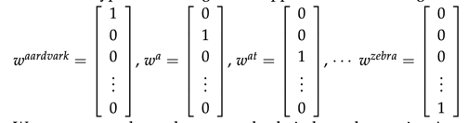

## 2.2. SVD-based methods

**Objective**: Finding word embeddings that captures some notion of similarity

**Idea**: Loop over a massive dataset and accumulate word co-occurrence counts in a matrix X. Then use SVD where the word vecors are the columns of U. 

**Distributional semantics**: The concept of representing the meaning of a word based on the context in which it usually appears. It is dense and can better capture similarity.


### 2.2.1. Word-document matrix

**Assumption**: words that are related will appear in the same documents. 
E.g.: « bonds » and « banks »

**Idea**: Loop over billions of documents and for each time word I appears in document j, we add one to entry Xij. 

**Problem**: Very large matrix that scales with the number of documents.

### 2.2.2. Window-based co-occurence matrix

**Idea**: Loop over billions of documents and for each time a word I appears in the neighborhood of word k, we add 1 to Xij. Note the additional parameter: the window size.

How to obtain word vectors? We perform SVD on the matrix, observe the singular values and cut them off at some index k based on the desired percentage variance captured.

**Problems**:
-	The dimensions of the matrix change very often
-	The matrix is sparse
-	Very high dimensional
-	Quadratic cost to train

## 2.3. Iteration-based methods, Word2Vec

**Objective**: Create a model that will be able to learn one iteration at a time and eventually be able to encode the probability of a word given its context

**Idea**: Design a model whose parameters are the word vectors. Train the model on a certain objective. At every iteration, we run our model, evaluate the errors, and follow and update rule that has some notion of penalizing the model parameters that caused the error (=backpropagation).

**2 algorithms**:
-	Continuous bag-of-words (CBOW): predict a center word from the surrounding context in terms of word vectors
-	Skip-gram: predicts the distribution (probability) of context words from a center word

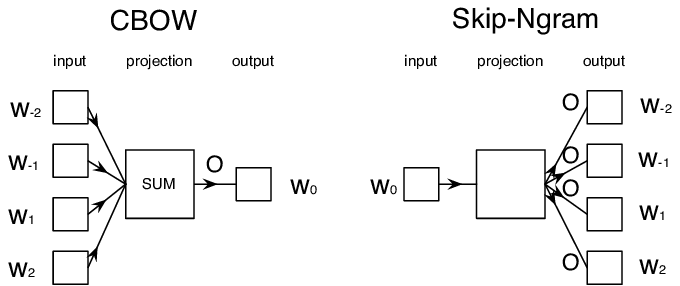

**2 training methods**:
-	Hierarchical softmax
-	Negative sampling

**Advantage**: much faster to compute and capture complex linguistic patterns beyond word similarity

**Problem**: fail to make use of global co-occurrence statistics

## 2.4. Global vector for word representation (GloVe)

**Idea**: Weighted least squares model that trains on global word-word co-occurrence counts and this makes efficient use of statistics

**Advantage**: Produces a word vector space with meaningful sub-structure (queen – king + man = woman)

**Used for**: Word analogy task, word similarity task

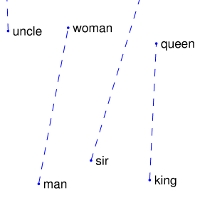

# 3. How to create language models?

Language models compute the probability of occurrence of a number of words in a particular sequence.

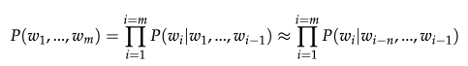

## 3.1. n-gram language models

**Objective**: Compute the probability of occurrence of a number of words in particular sequence looking at the n-1 previous words.

**Problem**: In some cases, the window of past consecutive n words may not be sufficient to capture the context.<br/>
E.g.: As the proctor started the clock, the students opened their *??*.

**2 issues**:
-	Sparsity problems (if n-gram never appears in corpus, then probability is 0).
-	Storage problems (As n increases or the corpus size increases, the model size increases as well).

**Limitation**: A finite window of previous words are considered for conditioning the language model

## 3.2. Recurrent Neural Networks (RNN)

**Objective**: Condition the language model on all previous words in the corpus

**How?** Because the same weights are applied repeatedly at each timestep. Thus the number of parameters the model has to learn is less, and most importantly, is independent of the length of the input sequence - thus defeating the curse of dimensionality.

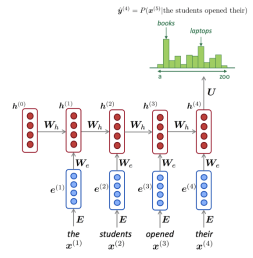

**Advantages**:
-	They can process input sequences of any length
-	The model size does not increase for longer input sequence lengths
-	The same weights are applied at every time step of the input, so there is symmetry in how inputs are processed

**Problems**:
-	Difficult to access information from many steps back due to problems like vanishing and exploding gradients

## 3.3. Deep bidirectional RNN

**Assumption**: It is possible to predict a word by looking at future words

**Objective**: Create more accurate and contextual representation of a word by concatenating forward and backward hidden layers

**Problems**: Same problem as with vanilla RNN architectures

## 3.4. GRU and LSTM

**Objective**: Capture long-term dependencies in the sequence of word. In practice, vanilla RNNs are very difficult to train due to the vanishing gradient issue

**Idea**: Design recurrent units (neurons) in such a way that they have more persistent memory thereby making it easier for RNNs to capture long-term dependencies.

**4 types of gates for GRU**:
-	New memory generation
-	Reset gate
-	Update gate
-	Hidden state


**5 types of gates for LSTM**:
-	Input gate
-	Forget gate
-	Output/Exposure gate
-	New memory cell
-	Final memory cell

# 4. How to deal with sequential output?

So far, we have predicted a single output: an NER label for a word, the single most likely next word in a sentence given the past few. However, there’s a whole class of NLP tasks that rely on sequential output.

E.g: 
- Translation (NMT = neural machine translation)
- Conversation
- Summarization

## 4.1. Seq2Seq models

**Advantage**: Can generate arbitrary output sequences after seeing the entire input. They can even focus in on specific parts of the input automatically to help generate a useful translation.

**Basic architecture**: 1 encoder (LSTM or bi-LSTM) – 1 decoder (LSTM or bi-LSTM)

**Role of the encoder**: Read the input sequence and generate a fixed-dimensional context vector C for the sequence.

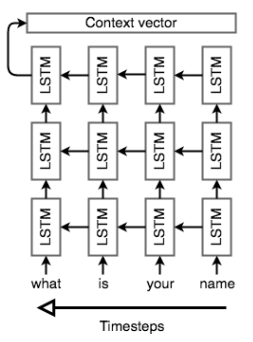

**Objective of the decoder**: Use a language model that’s “aware” of the words that it’s generated so far and of the input. 

**Problem**: When using a single “context vector” for sequence-to-sequence models, often different parts of an input have different levels of significance. Moreover, different parts of the output may even consider different parts of the input “important”.

## 4.2. Attention mechanism

**Objective**: Give the decoder network a look at the entire input sequence at every decoding step; the decoder can then decide what input words are important at any point in time

E.g.: The ball is on the field
“ball”, “on” and “field” are the most important words in the sentence, hence we pay attention to them

**Idea**: Providing the decoder network with a look at the entire input sequence at every decoding step; the decoder can then decide what input words are important at any point in time.


**Main types of attention**:

-	Global attention
-	Local attention
-	Self attention


## 4.3. How to effectively decode a sentence in a Seq2Seq model? (Beam search, ...)

**Objective**: Given an original sentence s, how to find the translation s* that maximizes P(s* given s).

**Problem**: The search space is huge, it needs to be shrunk

**Algorithms to achieve this**:
-	Exhaustive search
-	Ancestral sampling
-	Greedy search
-	Beam search

## 4.4. How to evaluate translation models?

-	**Multi-task learning**: if your word representation is useful for solving some challenging task, then the model must be encoding relevant information in your vectorized representation.
E.g.: using the output of a translation model for question-answering	

-	**Bilingual evaluation understudy (BLEU)**

# 5. How to deal with large vocabulary?

**Problem**: Seq2Seq models have a hard time dealing with large vocabulary size. These models predict the next word in the sequence by computing a target probabilistic distribution over the entire vocabulary using softmax. Softmax is expensive to compute and its complexity scales proportionally to the vocabulary size.

## 5.1. Scaling softmax

**Objective**: Reducing the time complexity of softmax

**2 algorithms**:
-	*Noise Contrastive Estimation*: approximate “softmax » by randomly sampling K words from negative samples. The computation complexity is reduced by a factor of K.


-	*Hierarchical softmax*: use a binary tree structure to more efficiently compute “softmax”, computational complexity: log V.

**Problem**: Both methods save computation during training step (when target word is known). At test time, one still has to compute the probability of all words in the vocabulary in order to make predictions.

## 5.2. Reducing vocabulary size

**Idea**: Replace words outside the vocabulary by < UNK >

**Problem**: Unreliable and infeasible at scale

## 5.3. Word and character-based models

**Idea**: Instead of dealing with words, let’s operate at sub-word levels by cutting tokens (words) into smaller pieces. 

Phonology posits a small set or sets of distinctive, categorical units that we call phonemes. Let’s try to change our perspective: instead of working with words or even splitting words into characters, let’s now consider n-gram characters. 

### 5.3.1. Word segmentation

**Objective**: Representing rare and unknown words as a sequence of subword units

**Idea**: Adapting the Byte-Pair encoding algorithm (a lossless compression algorithm).

**How**: start with a vocabulary of characters and keep extending the vocabulary with most frequent n-gram pairs in the data set. This process is repeated until all n-gram pairs are selected or vocabulary size reaches some threshold.

**2 variants**:
-	Wordpiece
-	Sentencepiece

### 5.3.2. Character-based models

**Objective**: Enable open-vocabulary word representation

**Idea**: for each word w with m characters, the models iterates over all characters to look up character embeddings

Using the same architecture as for word-level model, but use smaller units called “word pieces”

### 5.3.3. FastText embeddings

**Objective**: Create a next generation efficient word2vec-like word representation library by leveraging n-gram characters

**Idea**: train bi-LSTM to compute embeddings that attempt to capture morphology

**Advantages**: better for rare words and languages with lots of morphology

### 5.3.4. Hybrid NMT

**Objective**: deal with unknown words and achieve open-vocabulary NMT

**How**: The system translates mostly at word-level and consults the character components for rare words. 

**Advantage**: Much faster and easier to train than character-based models
It never produces unknown words as in the case of word-based models.

**Structure of a hybrid NMT**:
-	Word-based translation as a Backbone
-	Source character-based representation
-	Target character-level generation

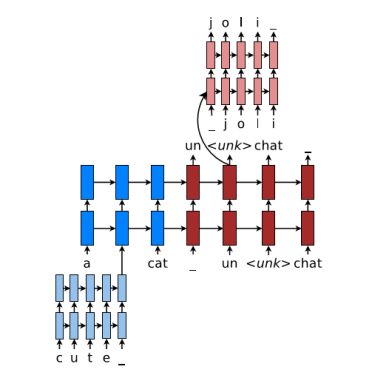

**How it works**: 2-stage decoding with a word-level beam search and char-level beam search for < unk > tokens

# 6. How to create contextual embeddings?

So far, we always have the same representation for a word type regardless of the context in which a word token occurs.

**Problem**: word embeddings are context free with GloVe, Word2Vec, FastText. Those language models are trained to predict the next word, but those language models are producing context-specific word representations at each position

**Objective**: obtain a very fine-grained word sense disambiguation

## 6.1. Tag LM, the pre-ELMo era

**Ideas in 3 steps**:
-	Pretrain word embeddings and language model
-	Prepare word embedding and LM embedding for each token in the input sequence
-	Use both word embeddings and LM embeddings in the sequence tagging model

## 6.2. ELMo

**Objective**: Learn word token vectors using long contexts not context windows

**Idea**: Learn a deep Bi-NLM and use all its layers in prediction

First run biLM to get representations for each word
Then let (whatever) end-task model use them
- Freeze weights of ELMo for puposes of supervised model
- Concatenate ELMo weights into task-specific model

**Limitations**: Stack of only two layers

## 6.3. ULMFit

**Idea**: Train language model on big general domain corpus (use biLM)<br />
Tune language model on target task data<br />
Fine-tune as classifier on target task<br />

## 6.4. Transformer models

**Advantage**: Stacks multiple encoder-decoder layers called transformer that enables a network to capture subtle context

**Idea**: Non-recurrent sequence-to-sequence encoder-decoder model

**Task**: machine translation with parallel corpus. Predict each translated word

**Limitations with deep bi-LSTM**: They ‘see themselves’, meaning that there is a form of leakage when training a network.

### 6.4.1. BERT (Bidirectional Encoder Representations from Transformers)

**Objective**: truly bidirectional information flow without leakage in a deep model

**Idea**: use a close task formulation where 15% of words are blanked out and predicted

**Limitations**: BERT has paved the way for a lot of transformer-based models which are all more resource-hungry than the previous one. 

### 6.4.2. ROBERTA (A robustly optimized BERT pretraining approach)

BERT trained for more epochs and on/more data 

**Limitations**: Absolute attention
E.g.: How much should dog attend to hot (in any position), and how much should dog in position 4 attend to the word in position 3?

### 6.4.3. XLNet

**Innovations**: Relative position embeddings, Permutation language modelling!

### 6.4.4. ELECTRA

**Objective**: How to achieve great performance while reducing training time and resources?	

**Idea**: Bidirectional model learns from all tokens (no more masked tokens). The structure of the model is 2-fold. First, generated tokens are predictions of a smaller language model on a masked sentence. Then, the discriminator learns how to make the distinction between generated tokens (from a smaller model) and original tokens.

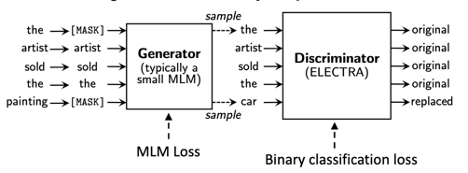

### 6.4.5. DistilBERT

**Objective**: Since BERT and other pretrained language models are extremely large and expensive, retaining BERT performance while having low-latency production services

**Idea**: Distillation: Use SOTA pre-training + fine-tuning technique to train model with maximum accuracy. Label a large amount of unlabeled input examples with the model. Train a second model “Student” (much smaller model) which is trained to mimic Teacher output.